In [1]:
import numpy as np
import pandas as pd
from datetime import datetime

from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import TimeSeriesSplit

import matplotlib.pyplot as plt

import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

In [2]:
def read_csv(file):
    df = pd.read_csv(file, parse_dates=True, index_col=0)
    return df

## XGBoost for Decomposition imputed dataset


In [26]:
X_train = read_csv('output/\CompleteDengueTrain_decomp_0.csv')
X_test = read_csv('output/\CompleteDengueTest_decomp_0.csv')

y = pd.read_csv('input/\dengue_labels_train.csv', parse_dates=True)

y = y.groupby(['year', 'weekofyear']).sum()
y_train = y.iloc[:734]
y_train = pd.DataFrame(index = X_train.index, data = y_train.total_cases.values)
y_test = y.iloc[734:]
y_test = pd.DataFrame(index = X_test.index, data = y_test.total_cases.values)


xgb_model = xgb.XGBClassifier(objective="reg:squarederror",
                                  eval_metric = 'rmse',
                                  max_depth=3,
                                  n_estimators=200,
                                  learning_rate=0.9
                              )
model = xgb_model.fit(X_train, y_train)

y_pred = model.predict(X_test)

MSE = mse(y_test, y_pred)
RMSE = np.sqrt(MSE)

print("\nRMSE: ", np.round(RMSE, 2))


RMSE:  29.22


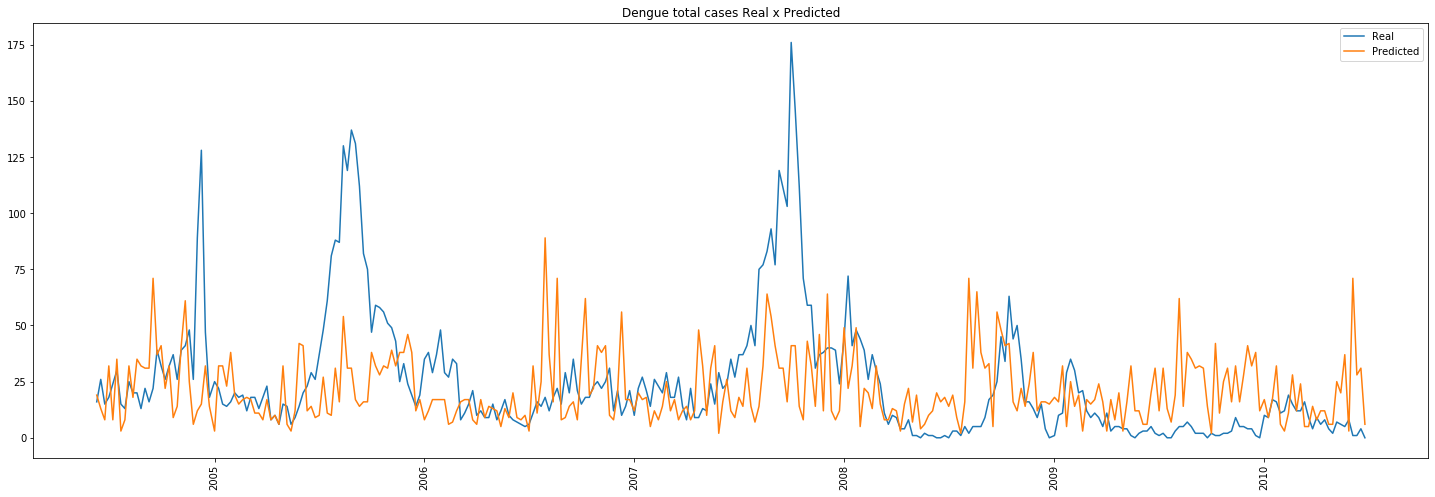

In [28]:
plt.figure(figsize=(25, 8))
plt.plot(y_test.index, y_test.values, label='Real')
plt.plot(y_test.index, y_pred, label='Predicted')
plt.title("Dengue total cases Real x Predicted")
plt.xticks(rotation=90)
plt.legend()
plt.show()